<a href="https://colab.research.google.com/github/marcy3ait/AerodinamicaComputacional/blob/master/Simu2_tabelaTaylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Aula 5 - SIMULAÇÃO 2 - AeroComputacional </center>


# Questão 2
Utilizando a tabela de Taylor derive um esquema de para aproximar a derivada
primeira usando os pontos j, j-1, j-2, j-3. Qual a ordem de precisão do método e o termo dominante do erro?
## implementação do método desenvolvido para questão.

Text(0, 0.5, 'f(x)')

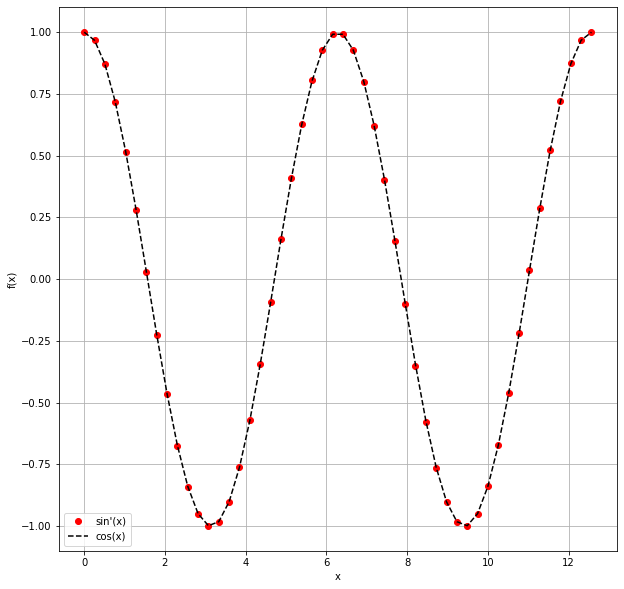

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

def TaylorMarcy(n,tf,f):
  '''
  Retorna uma aproximação da derivada primeira usando os pontos j, j-1,j-2 e j-3
  Parametros:
  n: número de pontos
  tf: valor limite do intervalo
  f: função a qual a derivada será aplicada
  '''
  x = np.linspace(0,tf,n)
  dx = x[1]-x[0]
  dudx = np.zeros(n)

  # pontos extremos
  dudx[0] = (-1/3*f[-4] + 3/2*f[-3] - 3*f[-2] +11/6*f[0])/dx 
  dudx[1] = (-1/3*f[-3] + 3/2*f[-2] - 3*f[0] +11/6*f[1])/dx 
  dudx[2] = (-1/3*f[-2] + 3/2*f[0] - 3*f[1] +11/6*f[2])/dx 
  
  for i in range(3,n):
    dudx[i] = (-1/3*f[i-3] + 3/2*f[i-2] - 3*f[i-1] +11/6*f[i])/dx 

  return dudx

n = 50
tf = 4*np.pi
dx = tf/n
x = np.linspace(0,tf,n)
f = np.sin(x)
A = TaylorMarcy(n,tf,f)
#plt.plot(A[1],A[2],'+')
plt.figure(figsize=(10,10))
plt.plot(x,A,'or', Label = 'sin\'(x)')
plt.plot(x,np.cos(x),'--k', Label = 'cos(x)')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')



# Questão 3
Através da análise do número de onda modificado, encontre quantos pontos por comprimento de onda (PPW) são necessários para obter um erro de 10%, 5% e 1% com o esquema **centrado de segunda ordem para derivada primeira**.

In [ ]:
def doubl(n,tf,f):
  '''
  Retorna o plot da derivada de aproximação dupla
  Parametros: 
  n: numero de pontos
  tf: valor limite do intervalo [0,tf] - deve ser definido como multiplo inteiro de 2pi
  f: função que a dericada é aplicada
  '''

  x = np.linspace(0,tf,n)
  dx = x[1]-x[0]
  dxdu = np.zeros(n)
  # para os extremos
  dxdu[0] = (f[1]-f[-2])/(2*dx)
  dxdu[n-1] = (f[1]-f[-2])/(2*dx)

  for i in range(1,n-1):  # esquema centrado de segunda ordem para primeira derivada
    dxdu[i] = (f[i+1]-f[i-1])/(2*dx)
    e = abs(np.cos(x[i])-dxdu[i])
  #plt.plot(x[1:-1],dxdu[1:-1],'+', label='D')
  return (e,x,dxdu)
n = 40 
tf = 2*np.pi
x = np.linspace(0,tf,n)
f = np.sin(x)
doubl(n,tf,f)
dx = x[1]-x[0]
k = np.zeros(n)
ke = np.zeros(n)
for i in range(2,n):
  k[i] = 2*np.pi/(i*dx)
  ke[i] = np.sin(dx*k[i])/dx
  print(f'Pontos = {i} ,{ke[i]},{k[i]*dx},{ke[i]/k[i]}'.format(i,ke[i],k[i],ke[i]/k[i]))

Pontos = 2 ,7.601435073412782e-16,3.141592653589793,3.8981718325193755e-17
Pontos = 3 ,5.375456730362473,2.0943951023931953,0.4134966715663441
Pontos = 4 ,6.207042780583919,1.5707963267948966,0.6366197723675814
Pontos = 5 ,5.903248483397125,1.2566370614359172,0.7568267286406569
Pontos = 6 ,5.3754567303624725,1.0471975511965976,0.8269933431326881
Pontos = 7 ,4.852861458886406,0.8975979010256551,0.8710264156975601
Pontos = 8 ,4.389042041265892,0.7853981633974483,0.9003163161571061
Pontos = 9 ,3.989810192153628,0.6981317007977319,0.9207254289585294
Pontos = 10 ,3.6484082067756924,0.6283185307179586,0.935489283788639
Pontos = 11 ,3.355780682876755,0.5711986642890533,0.9465022438883155
Pontos = 12 ,3.103521390291959,0.5235987755982988,0.954929658551372
Pontos = 13 ,2.884556610004332,0.483321946706122,0.961518870001444
Pontos = 14 ,2.6931349305023953,0.44879895051282753,0.9667663853085522
Pontos = 15 ,2.5246317440025834,0.41887902047863906,0.9710122092317628
Pontos = 16 ,2.375332436110805,0.

Text(0, 0.5, 'ke*d')

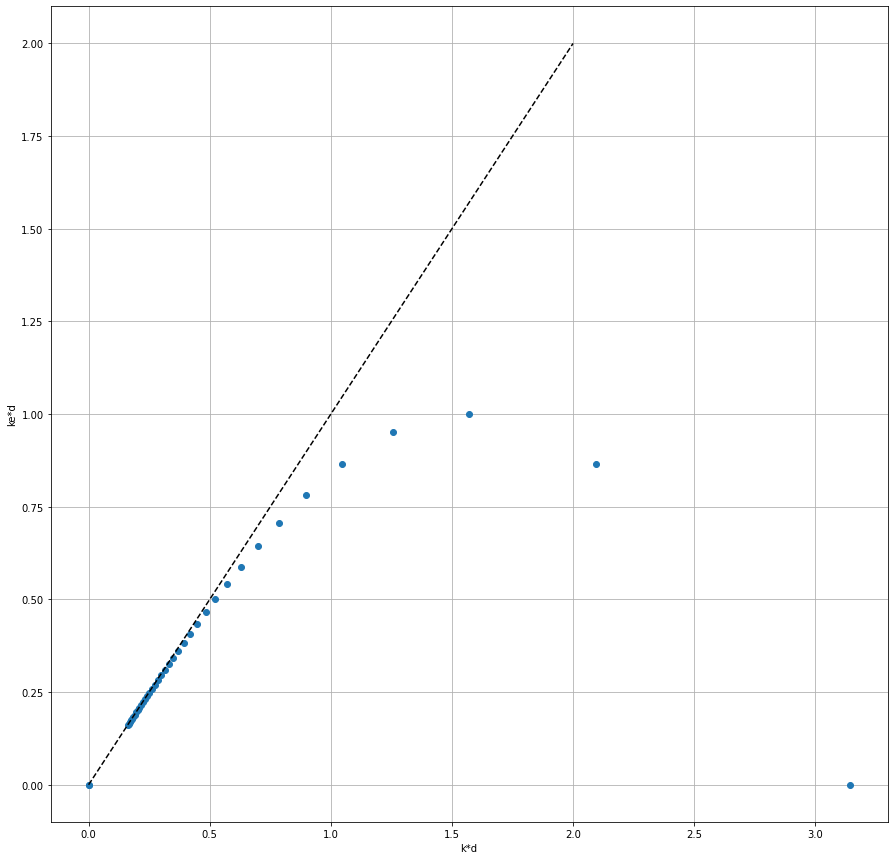

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(k*dx,ke*dx,'o')
plt.plot(range(0,3),range(0,3),'--k')
plt.grid()
plt.xlabel('k*d')
plt.ylabel('ke*d')

Como era esperado precisamos de pelo menos 8 pontos para obter um erro aceitavel de 10%, para obtermos um erro de cerca de 5.4% precisamos de pelo menos 11 pontos e para obter um erro menor que 1% precisamos de no mínimo de 26 pontos.
